In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser','Pullover', 'Dress','Coat',
               'Sandal', 'Shirt', 'Sneaker' ,'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
test_labels.shape

(10000,)

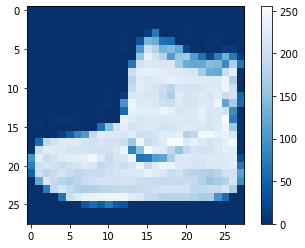

In [8]:
# 打印一张图片试试看
plt.imshow(train_images[0], cmap=plt.cm.Blues_r)
plt.colorbar()
plt.grid(False)

In [9]:
# 标准化处理
train_images = train_images / 255.
test_images = test_images / 255.

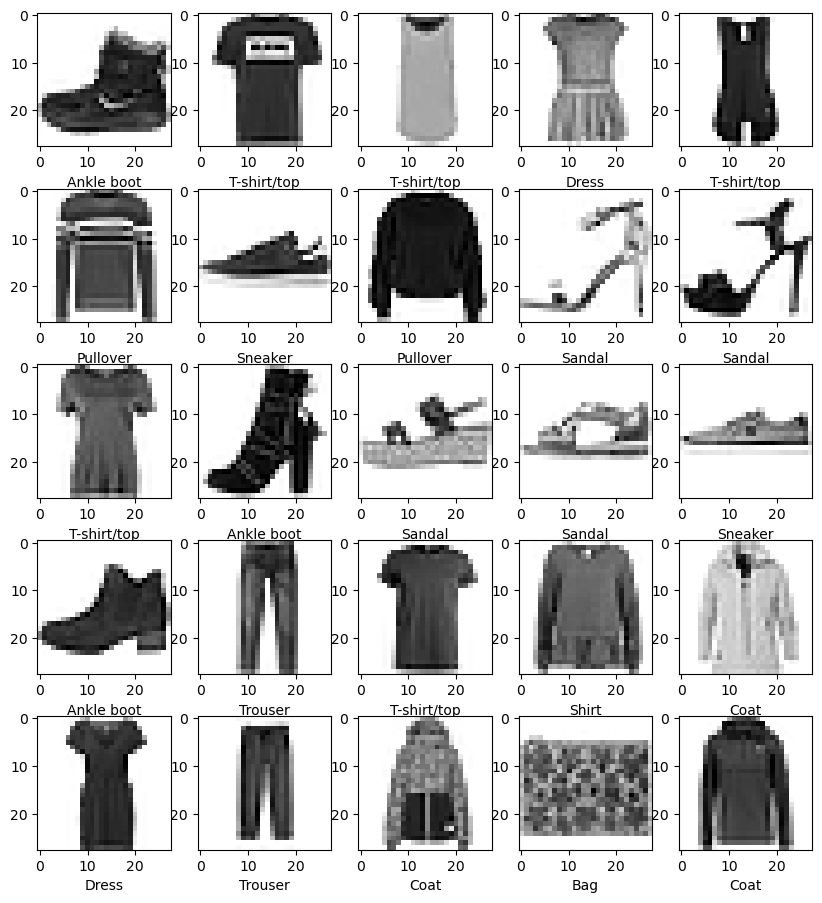

In [10]:
plt.figure(figsize=(10, 10), dpi=100)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xlabel(class_names[train_labels[i]])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.subplots_adjust(bottom=0.03)
plt.show()

In [11]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [12]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['acc'])

In [13]:
model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5025 - acc: 0.8232

In [42]:
predict_labels = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [43]:
predict_labels.shape

(10000, 10)

In [44]:
test_labels.shape

(10000,)

In [45]:
# predict_labels = np.argmax(predict_labels, axis=1)
# predict_labels.shape

In [46]:
# sum(test_labels == predict_labels) / 10000 * 100

In [47]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
test_loss, test_acc

313/313 - 1s - loss: 0.5139 - acc: 0.8897 - 1s/epoch - 3ms/step


(0.5139090418815613, 0.8896999955177307)

In [48]:
def plot_image(i, prediction_array, true_label, img):
    prediction_array, true_label, img = prediction_array, true_label[i], img[i]
    plt.grid(False)
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(prediction_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                         100*np.max(prediction_array),
                                         color))

In [61]:
def plot_value_array(i, prediction_array, true_label):
    prediction_array, true_label = prediction_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), prediction_array, color='#777777')
    plt.ylim([0, 1])
    predict_label = np.argmax(prediction_array)

    thisplot[predict_label].set_color('red')
    thisplot[true_label].set_color('blue')

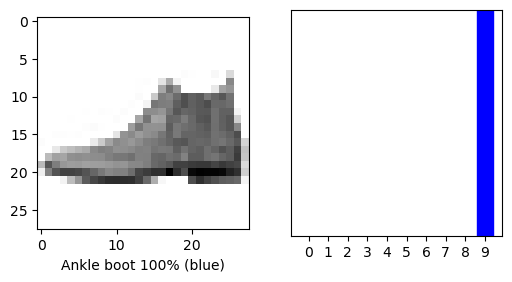

In [62]:
# 随机样本测试
i = 0
plt.figure(figsize=(6, 3), dpi=100)
plt.subplot(121)
plot_image(i, predict_labels[i], test_labels, test_images)
plt.subplot(122)
plot_value_array(i, predict_labels[i], test_labels)
plt.show()

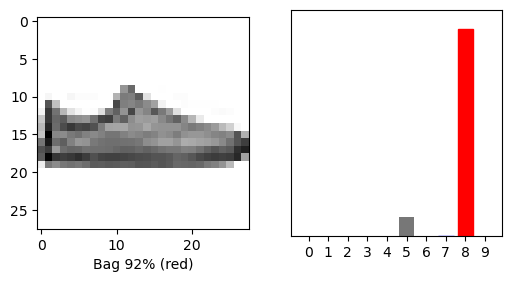

In [63]:
# 随机样本测试
i = 12
plt.figure(figsize=(6, 3), dpi=100)
plt.subplot(121)
plot_image(i, predict_labels[i], test_labels, test_images)
plt.subplot(122)
plot_value_array(i, predict_labels[i], test_labels)
plt.show()

In [64]:
# 保存训练好的模型
# model.save('../0_resources/fashion.h5')  # 主要保存两部分 网络模型架构 和 权重参数

In [65]:
# 加载保存好的模型
# model2 = tf.keras.models.load_model('../0_resources/fashion.h5')
# 验证模型的网络结构
# model2.summary()

In [66]:
# 模型的网络架构
# config = model.to_json()
# 单独保存模型的网络结构
# with open('../0_resources/fashion_net_config.json', 'w') as w:
#     w.write(config)

In [67]:
# 单独保存模型权重参数
# model.save_weights('../0_resources/fashion_weights.h5', overwrite=True)

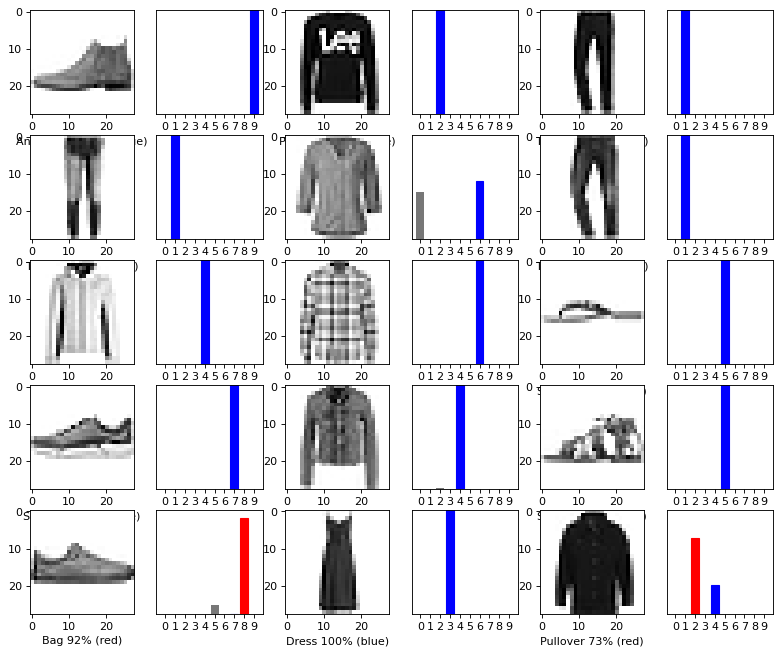

In [68]:
num_rows = 5
num_clos = 3
num_images = num_clos * num_rows
plt.figure(figsize=(2 * 2 * num_clos, 2 * num_rows), dpi=80)
for i in range(num_images):
    plt.subplot(num_rows, 2*num_clos, 2*i+1)
    plot_image(i, predict_labels[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_clos, 2*i+2)
    plot_value_array(i, predict_labels[i], test_labels)
plt.show()